# item 1 - Analyze the dataset
Parse the groundtruth information into a dictionary and a pandas table

In [1]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

%matplotlib inline

import numpy as np
import os, sys
import imageio
import pandas as pd
import matplotlib.pyplot as plt

path_txt = os.path.join('dataset', 'train', 'gt')
path_mask = os.path.join('dataset', 'train', 'mask')

dirs_txt = os.listdir(path_txt)
dirs_mask = os.listdir(path_mask)

data = dict()

for gt in dirs_txt:
    with open(os.path.join(path_txt, gt)) as f:
        lines = f.readlines()
        
        im_name = gt.replace('gt', 'mask').replace('txt', 'png')
        im_open = (imageio.imread(os.path.join(path_mask, im_name)))

        lista = list()
        
        # Extract grountruth information
        for l in lines:
            tly, tlx, bry, brx, tipo = l.split(' ')  
            tly, tlx, bry, brx = map(float, [tly, tlx, bry, brx])
            d = dict()
            d['type'] = tipo.strip()
            
            w = brx - tlx
            h = bry - tly
            
            d['width'] = w
            d['height'] = h
            d['bbox_area'] = w*h
            d['form_factor'] = w/h
            
            d['tly'] = round(tly)
            d['tlx'] = round(tlx)
            d['bry'] = round(bry)
            d['brx'] = round(brx)
            
            sub_mask = im_open[d['tly']:d['bry'], d['tlx']:d['brx']]
            mask_area = np.count_nonzero(sub_mask)
            d['mask_area'] = mask_area
            d['filling_ratio'] = mask_area / d['bbox_area']
            
            lista.append(d)
            
        data[gt] = lista
    

In [2]:
# Show information in pandas format
columns = ['type','width','height','form_factor','bbox_area','mask_area','filling_ratio']
df = pd.DataFrame.from_dict({(i,n): data[i][n]
                        for i in data.keys()
                        for n,v in enumerate(data[i])}, columns=columns, orient='index').sort_values(['type'])
df

,,type,width,height,form_factor,bbox_area,mask_area,filling_ratio
gt.01.001555.txt,0,A,79.70,72.51,1.099159,5779.0470,2905,0.502678
gt.01.001777.txt,0,A,86.73,79.25,1.094385,6873.3525,3438,0.500193
gt.01.001784.txt,0,A,140.81,125.71,1.120118,17701.2251,8927,0.504315
gt.01.001785.txt,0,A,184.71,165.30,1.117423,30532.5630,15232,0.498877
gt.01.001787.txt,0,A,104.12,103.53,1.005699,10779.5436,5419,0.502711
gt.01.001788.txt,0,A,87.64,85.89,1.020375,7527.3996,3752,0.498446
gt.01.001789.txt,0,A,130.59,131.18,0.995502,17130.7962,8612,0.502720
gt.01.001796.txt,0,A,80.73,77.05,1.047761,6220.2465,3134,0.503839
gt.01.001797.txt,0,A,68.55,64.30,1.066096,4407.7650,2186,0.495943
gt.01.001798.txt,0,A,62.20,58.10,1.070568,3613.8200,1804,0.499195


Maximum values
       width  height  form_factor   bbox_area  mask_area  filling_ratio
type                                                                   
A     205.89  179.91     1.227632  37041.6699      18502       0.524561
B     123.23  149.01     1.185969  18362.5023       9164       0.499061
C     235.30  237.65     1.068369  55919.0450      43770       0.786658
D     201.47  183.83     1.095958  37036.2301      31318       0.845604
E     218.90  215.86     1.067998  47251.7540      37035       0.784436
F     273.53  220.53     1.419829  52695.5545      52608       1.008235


Minimum values
      width  height  form_factor  bbox_area  mask_area  filling_ratio
type                                                                 
A     30.14   29.75     0.745039   909.7550        457       0.490679
B     52.52   44.96     0.750674  2361.2992       1157       0.489210
C     35.69   36.80     0.644526  1374.4800       1077       0.777067
D     29.46   30.96     0.648589   912.081

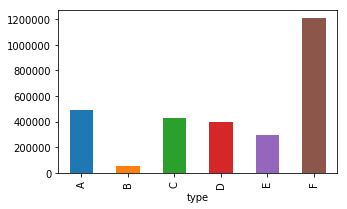

In [3]:
print("Maximum values")
type_counts = df.groupby('type').aggregate(max)
print(type_counts)

type_counts = df.groupby('type').aggregate(min)
print("\n\nMinimum values")
print(type_counts)

print("\n\nSummatory")
type_counts = df.drop(columns=['form_factor','filling_ratio']).groupby('type').aggregate(sum)
print(type_counts)

type_counts['mask_area'].plot(figsize=(5, 3),kind='bar',sort_columns=True)
normalized_df=type_counts['mask_area']/type_counts['mask_area'].sum()
print("\n\nPercentage of pixels per class")
print(normalized_df)


We can see that the total number of pixels of each class 

      width  height  form_factor  bbox_area  mask_area  filling_ratio
type                                                                 
A     92.27   86.62         1.06    9529.07    4772.44           0.50
B     83.71   85.01         1.02    7711.40    3811.79           0.49
C     96.42  100.35         0.95   11615.66    9094.53           0.78
D     76.97   78.62         0.97    7135.12    5609.65           0.78
E     88.98   96.20         0.94   10069.54    7881.18           0.78
F     85.63  103.52         0.83   10177.02   10092.66           0.99
       width  height  form_factor  bbox_area  mask_area  filling_ratio
type                                                                  
A     41.336  38.008        0.073   8279.863   4143.273          0.005
B     23.771  30.346        0.148   4742.369   2355.826          0.003
C     46.248  43.710        0.108  11043.924   8649.408          0.002
D     34.466  32.731        0.085   6220.393   5094.719          0.055
E     38.362  

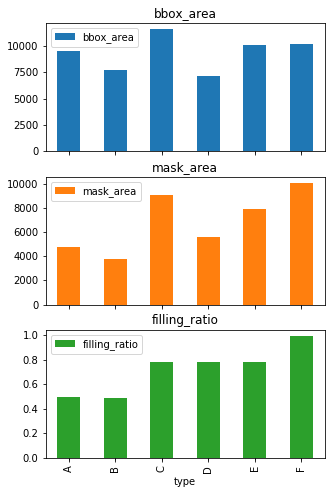

In [4]:
type_counts = df.groupby('type').aggregate(np.average).round(2)
print(type_counts)
type_counts.drop(columns=['width','height','form_factor']).plot(figsize=(5, 8),kind='bar',sort_columns=True,subplots=True)

type_counts = df.groupby('type').aggregate(np.std).round(3)
print(type_counts)

type_counts = df.groupby('type').aggregate(np.median).round(2)
print(type_counts)

In [5]:
# Group data by "type" (letter) and get statistics:

# Function = get_stats (only shape, aspect ratio, etc, NOT COLOUR)

# Queremos estadisticas de tamaño y forma en función de cada letra        

# Item 2 - Split training dataset

Extract the 30% of the training images of each class to set up a validation dataset

A    103
B     14
C     47
D     71
E     38
F    120
Name: type, dtype: int64


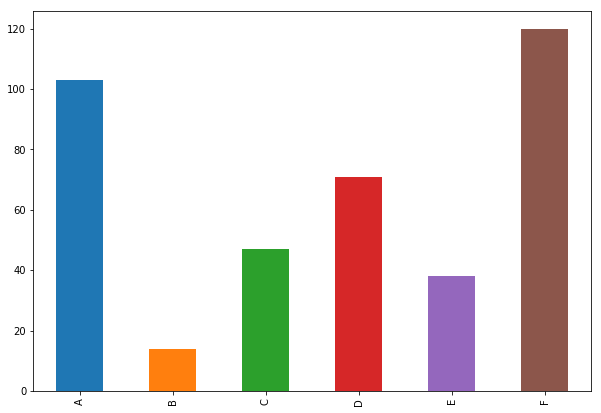

In [6]:
# Count number of signals per class
n_signals = df['type'].value_counts(sort=False).reindex(['A','B','C','D','E','F'])
print(n_signals)

# Plot
df['type'].value_counts(sort=False).reindex(['A','B','C','D','E','F']).plot(figsize=(10, 7),kind='bar',sort_columns=True)


In [7]:
# Get only one class
df_filtered = df[df['type'] == "B"]
df_filtered

,,type,width,height,form_factor,bbox_area,mask_area,filling_ratio
gt.01.001223.txt,0,B,57.14,48.18,1.185969,2753.0052,1372,0.498364
gt.01.001222.txt,0,B,52.52,44.96,1.168149,2361.2992,1157,0.489984
gt.01.003462.txt,0,B,106.70,96.34,1.107536,10279.4780,5093,0.495453
gt.00.001768.txt,0,B,80.61,87.42,0.922100,7046.9262,3482,0.494116
gt.00.001766.txt,0,B,120.82,121.22,0.996700,14645.8004,7220,0.492974
gt.00.004563.txt,0,B,64.70,62.74,1.031240,4059.2780,2009,0.494916
gt.00.004564.txt,0,B,62.26,57.36,1.085425,3571.2336,1767,0.494787
gt.00.004565.txt,0,B,70.10,68.38,1.025154,4793.4380,2345,0.489210
gt.00.000978.txt,0,B,90.09,78.75,1.144000,7094.5875,3505,0.494039
gt.00.000977.txt,0,B,69.94,62.47,1.119577,4369.1518,2156,0.493460


In [8]:
df_sorted_train = df_filtered.sample(frac=0.7)
df_sorted_train

,,type,width,height,form_factor,bbox_area,mask_area,filling_ratio
gt.00.004563.txt,0,B,64.70,62.74,1.031240,4059.2780,2009,0.494916
gt.00.000979.txt,0,B,111.84,99.60,1.122892,11139.2640,5469,0.490966
gt.01.003462.txt,0,B,106.70,96.34,1.107536,10279.4780,5093,0.495453
gt.00.001768.txt,0,B,80.61,87.42,0.922100,7046.9262,3482,0.494116
gt.01.001223.txt,0,B,57.14,48.18,1.185969,2753.0052,1372,0.498364
gt.01.001222.txt,0,B,52.52,44.96,1.168149,2361.2992,1157,0.489984
gt.00.001526.txt,0,B,123.23,149.01,0.826991,18362.5023,9164,0.499061
gt.00.001528.txt,0,B,72.41,96.46,0.750674,6984.6686,3456,0.494798
gt.00.001527.txt,0,B,89.52,117.28,0.763302,10498.9056,5170,0.492432
gt.00.004564.txt,0,B,62.26,57.36,1.085425,3571.2336,1767,0.494787


In [9]:
# Save train selection
tuple(zip(df_sorted_train.index.get_level_values(0).tolist(),df_sorted_train.index.get_level_values(1).tolist()))


(('gt.00.004563.txt', 0),
 ('gt.00.000979.txt', 0),
 ('gt.01.003462.txt', 0),
 ('gt.00.001768.txt', 0),
 ('gt.01.001223.txt', 0),
 ('gt.01.001222.txt', 0),
 ('gt.00.001526.txt', 0),
 ('gt.00.001528.txt', 0),
 ('gt.00.001527.txt', 0),
 ('gt.00.004564.txt', 0))

In [10]:
# Delete train selection to get validation selection
df_sorted_test = pd.concat([df_filtered,df_sorted_train]).drop_duplicates(keep=False)
tuple(zip(df_sorted_test.index.get_level_values(0).tolist(),df_sorted_test.index.get_level_values(1).tolist()))

(('gt.00.001766.txt', 0),
 ('gt.00.004565.txt', 0),
 ('gt.00.000978.txt', 0),
 ('gt.00.000977.txt', 0))

Functions to do all the process in one cell

In [11]:
def split_class(signal_class, train_percentage):
    
    # Choose one signal class
    df_filtered = df[df['type'] == signal_class]
    
    # Sample randomly the percentage choosen
    df_sorted_train = df_filtered.sample(frac=train_percentage)
    
    # Save train selection
    train_images = tuple(zip(df_sorted_train.index.get_level_values(0).tolist(),df_sorted_train.index.get_level_values(1).tolist()))
    
    # Delete train selection to get validation selection
    df_sorted_test = pd.concat([df_filtered,df_sorted_train]).drop_duplicates(keep=False)
    val_images = tuple(zip(df_sorted_test.index.get_level_values(0).tolist(),df_sorted_test.index.get_level_values(1).tolist()))
    
    return train_images, val_images

def split_dataset(data,percentage, classes):
    
    train_images = []
    val_images = []
    
    for signal_class in classes:
        temp_train_images, temp_val_images = split_class(signal_class, percentage)
        train_images += temp_train_images
        val_images += temp_val_images
    return train_images, val_images


classes_red = ['A','B','C']
classes_blue = ['D','F']
classes_mix = ['E']

train_images_red, val_images_red = split_dataset(data, 0.7, classes_red)
train_images_blue, val_images_blue = split_dataset(data, 0.7, classes_blue)
train_images_mix, val_images_mix = split_dataset(data, 0.7, classes_mix)

train_images = train_images_red + train_images_blue + train_images_mix
val_images = val_images_red + val_images_blue + val_images_mix

#print(train_images)
#print(val_images)
    

# Item 3 - Separation by colour


Para cada imagen de prueba, nos basamos en el diccionario y usamos el bounding box que ya calculamos.

Recortamos la imagen, le calculamos el histograma. Sumamos los histogramas de todas las imágenes y obtenemos la suma total.

Luego hacemos lo mismo y al recortar la roi de cada imagen convertimos la roi de rgb a hsv, calculamos el histograma
y obtenemos la suma de todos los histogramas. 

Con estas cosas deberíamos poder obtener los thresholds a aplicar luego.


Hacer gráficos chetos de los histogramas. Ajustar con multiples gaussianas, calcular promedio, mediana, std, etc.
Compararlos y elegir el mejor.

Luego aplicar las máscaras con los thresholds calculados

In [12]:
# Convert RGB images tu HUE images

# Get stats from HUE images

# Plot and compare

# Select thresholds (RGB y HUE)

# Create masks using previous thresholds



# Calculate histograms:

In [13]:
from skimage import color

path_jpg = os.path.join('dataset', 'train')    
dirs_jpg = os.listdir(path_jpg)

##############################
# Calculate color histograms:
##############################

def color_histogram(gt_dictionary, train_selec, path_jpg, color_space):

    c0_hist = np.zeros(255)
    c1_hist = np.zeros(255)
    c2_hist = np.zeros(255)

    for gt, position in train_selec:
        v = gt_dictionary[gt][position]

        jpg_name = gt.replace('gt.', '').replace('txt', 'jpg')
        mask_name = gt.replace('gt', 'mask').replace('txt', 'png')

        jpg_roi = imageio.imread(os.path.join(path_jpg, jpg_name))[v['tly']:v['bry'], v['tlx']:v['brx']]
        mask_roi = imageio.imread(os.path.join(path_mask, mask_name))[v['tly']:v['bry'], v['tlx']:v['brx']]

        if color_space=='rgb':
            final_roi = jpg_roi
            r0 = 0
            rf = 255

        elif color_space=='hsv':
            final_roi = color.rgb2hsv(jpg_roi) 
            r0 = 0
            rf = 1

        elif color_space=='ycbcr':
            final_roi = color.rgb2ycbcr(jpg_roi)
            r0 = 0
            rf = 255

        elif color_space=='xyz':
            final_roi = color.rgb2xyz(jpg_roi)
            r0 = 0
            rf = 1

        mask_roi[mask_roi==0] = 0
        mask_roi[mask_roi!=0] = 1

        bins = np.histogram(final_roi[:,:,0] * mask_roi, bins=255, range=(r0,rf))[1]
        c0_hist += np.histogram(final_roi[:,:,0] * mask_roi, bins=255, range=(r0,rf))[0]
        c1_hist += np.histogram(final_roi[:,:,1] * mask_roi, bins=255, range=(r0,rf))[0]
        c2_hist += np.histogram(final_roi[:,:,2] * mask_roi, bins=255, range=(r0,rf))[0]

    return bins, c0_hist, c1_hist, c2_hist, r0, rf


######################################
# Calculate RGB normalized histogram:
######################################

def norm_histogram(gt_dictionary, train_selec, path_jpg, color_space):

    c0_hist = np.zeros(255)
    c1_hist = np.zeros(255)
    c2_hist = np.zeros(255)
    
    for gt, position in train_selec:
        v = gt_dictionary[gt][position]

        jpg_name = gt.replace('gt.', '').replace('txt', 'jpg')
        mask_name = gt.replace('gt', 'mask').replace('txt', 'png')

        # Important: in order to normalize we need to read THE FULL IMAGE. If we normalize the rois, 
        # we will be training our algorithm poorly.After trying this, we saw all images have saturated
        # pixels (aka normalized image = original image). 

        # We will normalize the ROIs, knowing this is poorly training the algorithm.

        jpg_roi = imageio.imread(os.path.join(path_jpg, jpg_name))[v['tly']:v['bry'], v['tlx']:v['brx']]
        mask_roi = imageio.imread(os.path.join(path_mask, mask_name))[v['tly']:v['bry'], v['tlx']:v['brx']]

        jpg_max_0 = np.max(jpg_roi[:,:,0])
        jpg_max_1 = np.max(jpg_roi[:,:,1])
        jpg_max_2 = np.max(jpg_roi[:,:,2])

        if color_space=='rgb':
            final_roi = jpg_roi
            jpg_max_0, jpg_max_1, jpg_max_2 = jpg_max_0, jpg_max_1, jpg_max_2 

        mask_roi[mask_roi==0] = 0
        mask_roi[mask_roi!=0] = 1

        bins = np.histogram(final_roi[:,:,0] * mask_roi, bins=255, range=(0,1))[1]
        c0_hist += np.histogram(final_roi[:,:,0] / jpg_max_0 * mask_roi, bins=255, range=(0,1))[0]
        c1_hist += np.histogram(final_roi[:,:,1] / jpg_max_1 * mask_roi, bins=255, range=(0,1))[0]
        c2_hist += np.histogram(final_roi[:,:,2] / jpg_max_2 * mask_roi, bins=255, range=(0,1))[0]

    return bins, c0_hist, c1_hist, c2_hist


###################
# Plot histograms:
###################

def plot_histogram(hist, r0, rf, color_name, color_plot):
    
    path_figures = os.path.join('figures')
    try:
        os.stat(path_figures)
    except:
        os.mkdir(path_figures)

    x = np.linspace(r0, rf, 255)
    
    plt.figure(figsize=(7,7))
    plt.bar(x[:-2], hist[1:-1], color=color_plot, width=0.8*(rf-r0)/255)
    #plt.ylim((0,60000))
    
    plt.title(color_name + ' histogram')
    plt.xlabel('8bit quantification')
    plt.ylabel('Total number of px')
    plt.savefig('figures/' + str(color_name) + '_hist.png')
    plt.show()



# Calculate histograms in different color spaces:

RGB histograms:

In [14]:
bins, r_hist_red, g_hist_red, b_hist_red, rgb0, rgbf = color_histogram(data, train_images_red, path_jpg, 'rgb')
bins, r_hist_blue, g_hist_blue, b_hist_blue, rgb0_blue, rgbf = color_histogram(data, train_images_blue, path_jpg, 'rgb')
bins, r_hist_mix, g_hist_mix, b_hist_mix, rgb0, rgbf = color_histogram(data, train_images_mix, path_jpg, 'rgb')

HSV histograms:


In [15]:
hbins, h_hist_red, s_hist_red, v_hist_red, hsv0, hsvf = color_histogram(data, train_images_red, path_jpg, 'hsv')
hbins, h_hist_blue, s_hist_blue, v_hist_blue, hsv0, hsvf = color_histogram(data, train_images_blue, path_jpg, 'hsv')
hbins, h_hist_mix, s_hist_mix, v_hist_mix, hsv0, hsvf = color_histogram(data, train_images_mix, path_jpg, 'hsv')

/Users/pablo/anaconda/envs/master-cvc-m1/lib/python3.6/site-packages/skimage/color/colorconv.py:275: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = (arr[idx, 1] - arr[idx, 2]) / delta[idx]
/Users/pablo/anaconda/envs/master-cvc-m1/lib/python3.6/site-packages/skimage/color/colorconv.py:279: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = 2. + (arr[idx, 2] - arr[idx, 0]) / delta[idx]
/Users/pablo/anaconda/envs/master-cvc-m1/lib/python3.6/site-packages/skimage/color/colorconv.py:283: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = 4. + (arr[idx, 0] - arr[idx, 1]) / delta[idx]
/Users/pablo/anaconda/envs/master-cvc-m1/lib/python3.6/site-packages/skimage/color/colorconv.py:269: RuntimeWarning: divide by zero encountered in true_divide
  out_s = delta / out_v


yCbCr histograms:

In [16]:
ybins, y_hist_red, cb_hist_red, cr_hist_red, ycbcr0, ycbcrf = color_histogram(data, train_images_red, path_jpg, 'ycbcr')
ybins, y_hist_blue, cb_hist_blue, cr_hist_blue, ycbcr0, ycbcrf = color_histogram(data, train_images_blue, path_jpg, 'ycbcr')
ybins, y_hist_mix, cb_hist_mix, cr_hist_mix, ycbcr0, ycbcrf = color_histogram(data, train_images_mix, path_jpg, 'ycbcr')

X,Y,Z histograms:

In [17]:
xbins, xx_hist_red, yy_hist_red, zz_hist_red, xyz0, xyzf = color_histogram(data, train_images_red, path_jpg, 'xyz')
xbins, xx_hist_blue, yy_hist_blue, zz_hist_blue, xyz0, xyzf = color_histogram(data, train_images_blue, path_jpg, 'xyz')
xbins, xx_hist_mix, yy_hist_mix, zz_hist_mix, xyz0, xyzf = color_histogram(data, train_images_mix, path_jpg, 'xyz')

# Plot histograms in different color spaces:

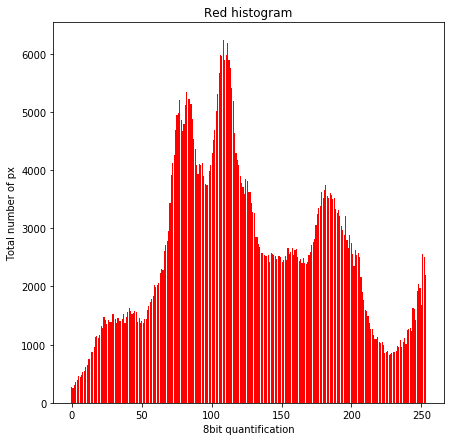

NameError: name 'g_hist' is not defined

In [19]:
# Questions: why can't I use the variable 'bins' to plot the histograms?
# Why do I get a divergence at 255?
# Why am I dividing by zero when converting to HSV?

    
# Plot RGB histograms:

plot_histogram(r_hist_red, rgb0, rgbf, 'Red', 'r')
plot_histogram(g_hist, rgb0, rgbf, 'Green', 'g')
plot_histogram(b_hist, rgb0, rgbf, 'Blue', 'b')

# Plot HSV histograms:

plot_histogram(h_hist, hsv0, hsvf, 'H', 'r')
plot_histogram(s_hist, hsv0, hsvf, 'S', 'g')
plot_histogram(v_hist, hsv0, hsvf, 'V', 'b')

# Plot yCbCr histograms:

plot_histogram(y_hist, ycbcr0, ycbcrf, 'y', 'r')
plot_histogram(cb_hist, ycbcr0, ycbcrf, 'Cb', 'g')
plot_histogram(cr_hist, ycbcr0, ycbcrf, 'Cr', 'b')

# Plot xyz histograms:

#plot_histogram(xx_hist, xyz0, xyzf, 'X', 'r')
#plot_histogram(yy_hist, xyz0, xyzf, 'Y', 'g')
#plot_histogram(zz_hist, xyz0, xyzf, 'Z', 'b')


# Normalized RGB histogram:

In [ ]:
from skimage import color

path_jpg = os.path.join('dataset', 'train')
dirs_jpg = os.listdir(path_jpg)

def norm_histogram(gt_dictionary, train_selec, path_jpg, color_space):

    c0_hist = np.zeros(255)
    c1_hist = np.zeros(255)
    c2_hist = np.zeros(255)
    
    for gt, position in train_selec:
        v = gt_dictionary[gt][position]

        jpg_name = gt.replace('gt.', '').replace('txt', 'jpg')
        mask_name = gt.replace('gt', 'mask').replace('txt', 'png')

        # Important: in order to normalize we need to read THE FULL IMAGE. If we normalize the rois, 
        # we will be training our algorithm poorly.After trying this, we saw all images have saturated
        # pixels (aka normalized image = original image). 

        # We will normalize the ROIs, knowing this is poorly training the algorithm.

        jpg_roi = imageio.imread(os.path.join(path_jpg, jpg_name))[v['tly']:v['bry'], v['tlx']:v['brx']]
        mask_roi = imageio.imread(os.path.join(path_mask, mask_name))[v['tly']:v['bry'], v['tlx']:v['brx']]

        jpg_max_0 = np.max(jpg_roi[:,:,0])
        jpg_max_1 = np.max(jpg_roi[:,:,1])
        jpg_max_2 = np.max(jpg_roi[:,:,2])

        if color_space=='rgb':
            final_roi = jpg_roi
            jpg_max_0, jpg_max_1, jpg_max_2 = jpg_max_0, jpg_max_1, jpg_max_2 

        mask_roi[mask_roi==0] = 0
        mask_roi[mask_roi!=0] = 1

        bins = np.histogram(final_roi[:,:,0] * mask_roi, bins=255, range=(0,1))[1]
        c0_hist += np.histogram(final_roi[:,:,0] / jpg_max_0 * mask_roi, bins=255, range=(0,1))[0]
        c1_hist += np.histogram(final_roi[:,:,1] / jpg_max_1 * mask_roi, bins=255, range=(0,1))[0]
        c2_hist += np.histogram(final_roi[:,:,2] / jpg_max_2 * mask_roi, bins=255, range=(0,1))[0]

    return bins, c0_hist, c1_hist, c2_hist


################################################
# Calculate histograms with traffic signal data:
################################################

# RGB histograms:

bins_norm, r_hist_norm, g_hist_norm, b_hist_norm = norm_histogram(data, train_images, path_jpg, 'rgb')



# Plot normalized histogram:

In [ ]:
plot_histogram(r_hist_norm, 0, 1, 'Red_norm', 'r')
plot_histogram(g_hist_norm, 0, 1, 'Green_norm', 'g')
plot_histogram(b_hist_norm, 0, 1, 'Blue_norm', 'b')

# Item 4 - Evaluate colour masks 

Comparar las máscaras obtenidas con el ground truth.

Podemos ver si sirven las funciones que ya nos dieron hechas.

# Lo que sigue a partir de aqui fueron pruebas hechas el martes:

In [ ]:
print(data['gt.00.005025.txt'][0])
print(data['gt.00.005025.txt'][1])

for gt in dirs_txt:
    print(data[gt][0]['filling_ratio'])

In [ ]:
for mask in dirs_mask:
    gt = mask.replace('mask', 'gt').replace('png', 'txt')
    m = (imageio.imread(os.path.join(path_mask, mask)))
    mask_area = m.sum()
    d = data[gt]
    d['mask_area'] = mask_area
    d['filling_ratio'] = mask_area / d['bbox_area']
    
    print(d['mask_area'], d['filling_ratio'], mask)
    

In [ ]:
print(dirs_mask[0].replace('mask', 'gt').replace('png', 'txt'))
print(dirs_txt[0])


In [ ]:
import matplotlib.pyplot as plt

% matplotlib inline

m = imageio.imread(os.path.join(path_mask,'mask.00.005025.png')).astype(np.int8)

plt.imshow(m[146:201, 1324:1375])
